<a href="https://colab.research.google.com/github/jmora67248-ui/Ciencia-de-datos/blob/main/TareaClase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install wquantiles


In [2]:
import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files




In [3]:
# Subir archivo CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Leer archivo CSV
df  = pd.read_csv(filename)

Saving crocodile_dataset.csv to crocodile_dataset.csv


In [4]:
df.head()


,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [5]:

df.tail(12)

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
988,989,Siamese Crocodile,Crocodylus siamensis,Crocodylidae,Crocodylus,3.04,163.6,Adult,Female,17-06-2023,Thailand,Slow Rivers,Critically Endangered,Robert Jordan DDS,Play blood list everything newspaper instituti...
989,990,Central African Slender-snouted Crocodile,Mecistops leptorhynchus,Crocodylidae,Mecistops,0.35,26.5,Hatchling,Unknown,02-02-2023,Cameroon,Forest Rivers,Endangered,Christopher Hudson,Land you health enjoy at so control including ...
990,991,Hall's New Guinea Crocodile,Crocodylus halli,Crocodylidae,Crocodylus,2.74,121.5,Adult,Male,28-03-2022,Papua New Guinea,Rivers,Least Concern,Casey Miles,Head member activity.
991,992,Nile Crocodile,Crocodylus niloticus,Crocodylidae,Crocodylus,3.13,285.8,Subadult,Male,14-07-2012,Egypt,Reservoirs,Least Concern,Deborah Moreno,They case TV team song.
992,993,West African Slender-snouted Crocodile,Mecistops cataphractus,Crocodylidae,Mecistops,2.26,88.5,Adult,Male,02-07-2007,Nigeria,Shaded Forest Rivers,Critically Endangered,John Mendoza,Common need phone teach audience project tax c...
993,994,West African Dwarf Crocodile,Osteolaemus tetraspis,Crocodylidae,Osteolaemus,0.39,4.9,Juvenile,Female,29-01-2005,Ghana,Forest Swamps,Vulnerable,Karen Fritz,Not east send style gun different energy arrive.
994,995,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,3.40,159.5,Adult,Female,26-10-2017,Guatemala,Rivers,Least Concern,Seth Norman,Cover risk health last student different.
995,996,West African Crocodile,Crocodylus suchus,Crocodylidae,Crocodylus,2.55,112.3,Adult,Female,01-10-2015,Mauritania,Lakes,Least Concern,Karen Avery,Thousand position sense church out explain sig...
996,997,Hall's New Guinea Crocodile,Crocodylus halli,Crocodylidae,Crocodylus,2.27,80.3,Subadult,Female,25-01-2023,Papua New Guinea,Freshwater Wetlands,Least Concern,Sylvia Turner,Painting try talk like maintain serious style.
997,998,West African Slender-snouted Crocodile,Mecistops cataphractus,Crocodylidae,Mecistops,2.34,93.5,Adult,Male,07-02-2014,Côte d'Ivoire,Swamps,Critically Endangered,Kristin Fleming,Produce off light before majority garden milit...


#overview

In [6]:

df.columns

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [8]:
df.describe()

,Observation ID,Observed Length (m),Observed Weight (kg)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.415110,155.771900
std,288.819436,1.097542,175.186788
min,1.000000,0.140000,4.400000
25%,250.750000,1.637500,53.225000
50%,500.500000,2.430000,100.600000
75%,750.250000,3.010000,168.875000
max,1000.000000,6.120000,1139.700000


In [13]:
print(f"media {df['Observed Weight (kg)'].mean()}")


print(f"mediana {df['Observed Weight (kg)'].median()}")

media 155.7719
mediana 100.6


In [15]:
trim_mean(df['Observed Weight (kg)'],0.1)

np.float64(117.06125)

In [17]:
df['Observed Length (m)'].mean()

np.float64(2.41511)

In [24]:
np.average(df['Observed Length (m)'],weights=df['Observed Weight (kg)'])

np.float64(3.4551515581436707)

In [26]:
wquantiles.median(df['Observed Length (m)'],weights=df['Observed Weight (kg)'])

np.float64(3.38)

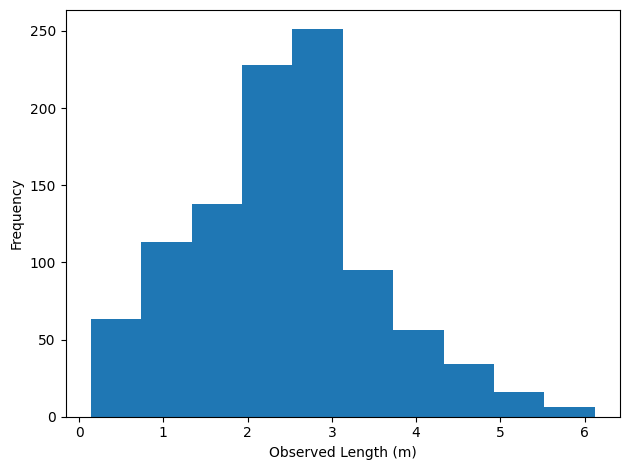

In [34]:
ax= df['Observed Length (m)'].plot.hist()
ax.set_xlabel('Observed Length (m)')
plt.tight_layout()
plt.show()

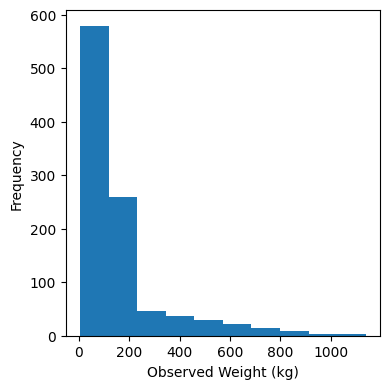

In [33]:
ax=(df['Observed Weight (kg)']).plot.hist(figsize=(4,4))
ax.set_xlabel('Observed Weight (kg)')
plt.tight_layout()
plt.show()

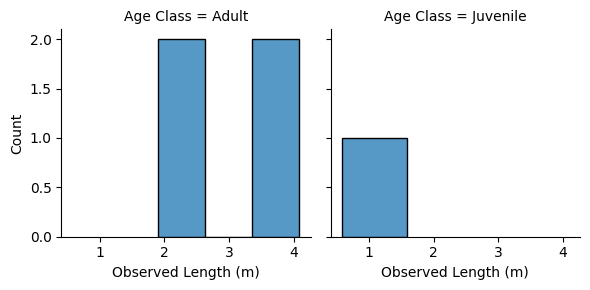

In [36]:
analisis=df.head()
g=sns.FacetGrid(analisis,col="Age Class")
g.map(sns.histplot,'Observed Length (m)')